# WE04-UniversalBank

## 1.0 Import and install python libraries and Set Random Seed

Here we import any Python libraries that we plan to use.

In [1]:
# import numpy and pandas libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

np.random.seed(1)

## 2.0 Load data 

In [2]:
# load data
universalbank = pd.read_csv("C:/Users/Admin/Downloads/UniversalBank.csv")

## 3.0 Conduct initial exploration of the data
We have a number of input variables and one target variable. For this analysis, the target variable is CD Account.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.

In [3]:
# look at the data
universalbank.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# generate a basic summary of the data
universalbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# generate a statistical summary of the numeric value in the data
universalbank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# Check the missing values by summing the total na's for each variable
universalbank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# create a list of these catagorical variables
category_var_list = list(universalbank.select_dtypes(include='object').columns)
category_var_list

[]

### Summary the findings from our initial evaluation of the data

* We have total 5000 observations(rows) and 14 columns
* We do not have any categorical variables
* Moreover we do not have any columns that have missing values
* There doesn't seem to be a problem with the catogorical class names

## 4.0 Process the data

### 4.1 Conduct any data prepartion that should be done *BEFORE* the data split.

1. As we will not be using the ID and the ZIP Code columns we will drop it. 
2. We dont have any observations (rows) due to missing na's we dont need to exclude any observations(rows).
3. As there is only 1 categorical variables i.e. Education we will encode it with Dummy encoding technique. 

#### Drop any columns/variables we will not be using

In [8]:
# Dropping ID
universalbank.drop(['ID','ZIP Code'], axis=1, inplace = True)

### 4.2 Non ordered Dummy encoding 

As education is label encoded we need to change it to dummy encoding.

In [9]:
universalbank = universalbank.join(pd.get_dummies(universalbank['Education'],prefix='Education',drop_first = True))
universalbank.drop('Education', axis=1, inplace = True)

In [10]:
# look at the data
universalbank.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


### 4.3 Split data (train/test)

Splitting the data into two sets train and test for model training and testing. 

In [11]:
# split the data into validation and training set
train_df, test_df = train_test_split(universalbank, test_size=0.3)

# to reduce repetition in later code, creating variables to represent the columns
# that are predictors and target
target = 'CD Account'
predictors = list(universalbank.columns)
predictors.remove(target)

### 4.4  Conduct any data prepartion that should be done *AFTER* the data split

1. As we dont have any missing numeric values we will dont need to impute it with mean of the variable/column
2. We will remove differences of scale by standardizing the numerical variables

#### Standardize numeric values
Now, let's create a common scale between the numberic columns by standardizing each numeric column

In [12]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Age','Experience','Income','Family','CCAvg','Mortgage']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array

test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object

#### To reduce repetition in later code, creating variables to represent the train,test predictors and target

In [13]:
X_train = train_df[predictors]
y_train = train_df[target] 
X_test = test_df[predictors]
y_test= test_df[target]

## 5.0 Model the data

First, let's create a dataframe to load the model performance metrics into.

In [14]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 5.1  Logistic Regression 

### 5.1.1 Logistic Regression Random Search CV using default,L1,L2,Elastic,liblinear regularization

Conduct an initial random search across a wide range of possible parameters.

In [15]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'max_iter':np.arange(500,1000),
    'penalty': ['None','l1','l2','elasticnet'],
    'solver':['saga','liblinear']
}

log_reg_model = LogisticRegression()
rand_search = RandomizedSearchCV(estimator = log_reg_model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.6708245243128964
... with parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 889}


### 5.1.2 Logistic Regression Grid Search CV using default,L1,L2,Elastic,liblinear regularization

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [16]:
score_measure = "recall"
kfolds = 5
max_iter = rand_search.best_params_['max_iter']
penalty = rand_search.best_params_['penalty']
solver = rand_search.best_params_['solver']

param_grid = {
    'max_iter': np.arange(max_iter-5,max_iter+5),  
    'penalty': [penalty],
    'solver': [solver]
}

log_reg_model = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallLogistic = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best recall score is 0.6708245243128964
... with parameters: {'max_iter': 884, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Logistic Regression", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.2  Support Vector Machine 

### 5.2.1 SVM Random Search CV using linear, rbf and poly kernal

Conduct an initial random search across a wide range of possible parameters.

In [18]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'C': np.arange(1,25),   
    'gamma': ['scale','auto'],
    'kernel':['linear','rbf','poly']
}

svm_model = SVC()
rand_search = RandomizedSearchCV(estimator = svm_model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The best recall score is 0.6711416490486257
... with parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 24}


### 5.2.2 SVM Grid Search CV using linear, rbf and poly kernal

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [19]:
score_measure = "recall"
kfolds = 5

C = rand_search.best_params_['C']
gamma = rand_search.best_params_['gamma']
kernel = rand_search.best_params_['kernel']

param_grid = {
    'C': np.arange(C-2,C+2),  
    'gamma': [gamma],
    'kernel': [kernel]
    
}

svm_model = SVC()
grid_search = GridSearchCV(estimator = svm_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallSVM = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best recall score is 0.6711416490486257
... with parameters: {'C': 24, 'gamma': 'scale', 'kernel': 'poly'}


In [20]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"SVM", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.3 Decision Tree Classifer

#### 5.3.1 DTree Random Search CV

Conduct an initial random search across a wide range of possible parameters.

In [21]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.7029598308668076
... with parameters: {'min_samples_split': 99, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.0091, 'max_leaf_nodes': 90, 'max_depth': 16, 'criterion': 'entropy'}


#### 5.3.2 DTree Grid Search CV

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [22]:
score_measure = "recall"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best recall score is 0.7029598308668076
... with parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.009000000000000001, 'min_samples_leaf': 5, 'min_samples_split': 97}


In [23]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.3.4 Diagrams of the Dtree:

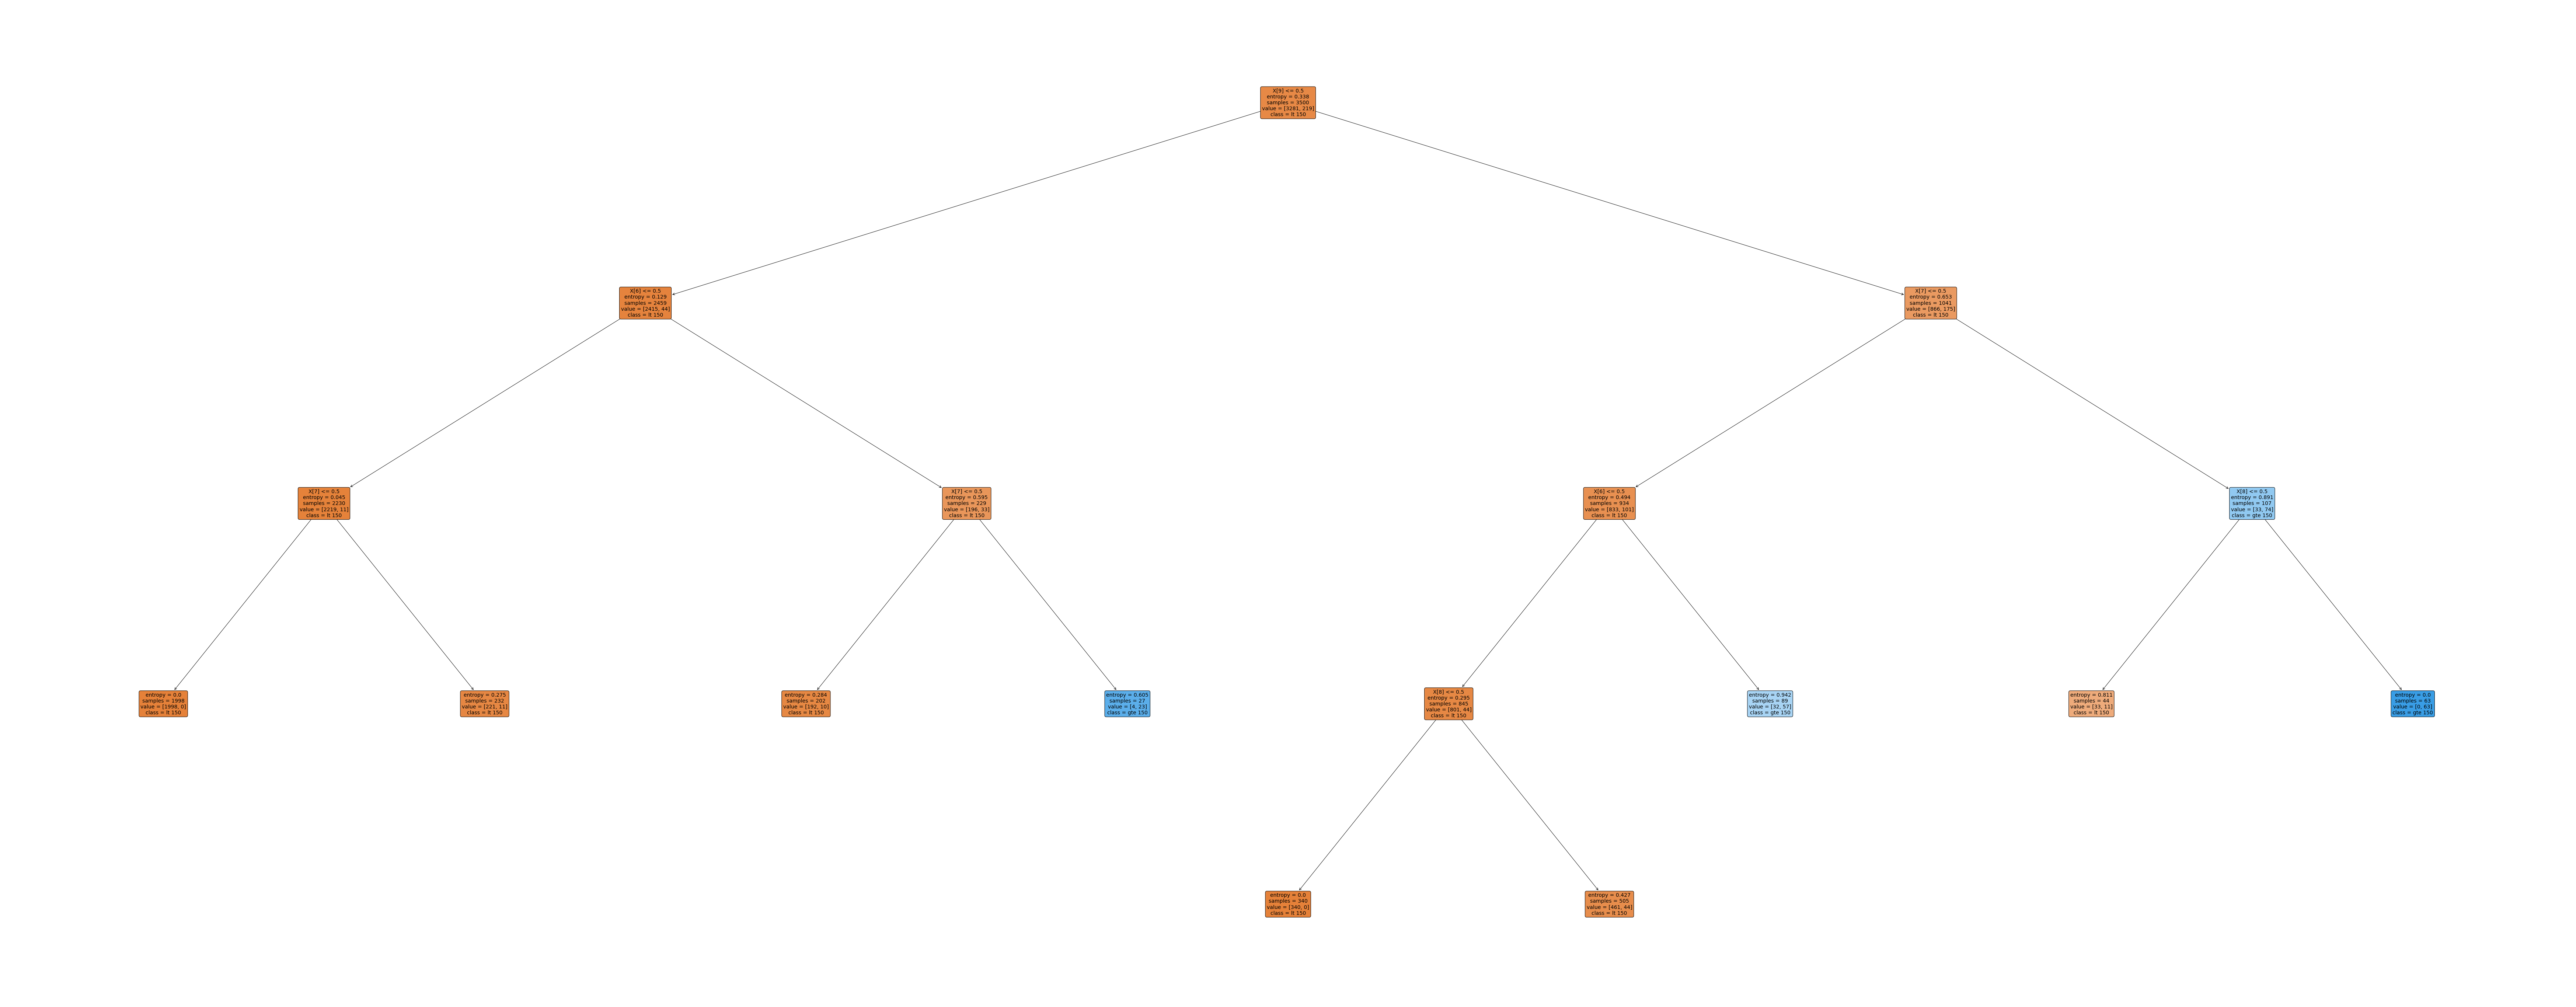

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_,
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Best Estimators for the 3 models

In [25]:
bestRecallLogistic

LogisticRegression(max_iter=884, solver='liblinear')

In [26]:
bestRecallSVM

SVC(C=24, kernel='poly')

In [27]:
bestRecallTree

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=88,
                       min_impurity_decrease=0.009000000000000001,
                       min_samples_leaf=5, min_samples_split=97)

## 6.0 Summary

Sorted by recall, the best models are:

In [28]:
performance.sort_values(by=['Recall'])

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.978000,1.000000,0.602410,0.751880
0,SVM,0.974667,0.909091,0.602410,0.724638
0,Decision Tree,0.964667,0.697368,0.638554,0.666667


## 7.0 Performance Evaluation

Recall value has been taken here in consideration to give FN more weight than the FP.

As per the above matrix, the best performance is of the Decision Tree with 63.8% recall score. The Logistic Regression and SVM has the recall value of 60.24%. 